In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from random import shuffle 

In [3]:
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [5]:
#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
#dl libraraies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import cv2                  
from tqdm import tqdm
import os 


In [7]:
class_names=['daisy',  'sunflower', 'tulip']
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
X=[]
Z=[]
IMG_SIZE=150
FLOWER_Daisy_DIR='C:/Users/bough/Desktop/machinelearning/flowers/Daisy'
FLOWER_Sunflower_DIR='C:/Users/bough/Desktop/machinelearning/flowers/Sunflower'
FLOWER_TULIP_DIR='C:/Users/bough/Desktop/machinelearning/flowers/tulip'

In [8]:
def assign_label(img,flower_type):
    return flower_type


def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

In [9]:
make_train_data('Daisy',FLOWER_CAT_DIR)
print('daisy len is :',len(X))

100%|██████████| 2284/2284 [00:36<00:00, 62.59it/s]

daisy len is : 2284


In [33]:
make_train_data('Sunflower',FLOWER_DOG_DIR)
print('sunflower len is :',len(X))

100%|██████████| 500/500 [00:01<00:00, 308.08it/s]

sunflower len is : 1000


In [18]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print('tulip len is :',len(X))

In [34]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(len(labels))
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.title('Image #{} : '.format(index) + labels[index])
    plt.show()

In [35]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [1]:
y_test

NameError: name 'y_test' is not defined

In [37]:
x_train.shape

(750, 150, 150, 3)

In [38]:
np.random.seed(42)

In [39]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2, activation = "softmax"))

In [40]:
batch_size=64
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [41]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [42]:
model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 18, 18, 96)      

In [52]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
29/29 [==============================] - 58s 2s/step - loss: 2.6767 - accuracy: 0.3636 - val_loss: 2.2252 - val_accuracy: 0.3430
Epoch 2/50
29/29 [==============================] - 57s 2s/step - loss: 1.1511 - accuracy: 0.3680 - val_loss: 1.0891 - val_accuracy: 0.3849
Epoch 3/50
29/29 [==============================] - 58s 2s/step - loss: 1.0782 - accuracy: 0.4059 - val_loss: 1.0954 - val_accuracy: 0.3961
Epoch 4/50
29/29 [==============================] - 59s 2s/step - loss: 1.0824 - accuracy: 0.4031 - val_loss: 1.0656 - val_accuracy: 0.4428
Epoch 5/50
29/29 [==============================] - 58s 2s/step - loss: 1.0623 - accuracy: 0.4120 - val_loss: 1.0644 - val_accuracy: 0.4171
Epoch 6/50
29/29 [==============================] - 58s 2s/step - loss: 1.0621 - accuracy: 0.4243 - val_loss: 1.0544 - val_accuracy: 0.4396
Epoch 7/50
29/29 [==============================] - 59s 2s/step - loss: 1.0656 - accuracy: 0.4137 - val_loss: 1.0573 - val_accuracy: 0.4428
Epoch 8/50
29/29 [==

###### plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

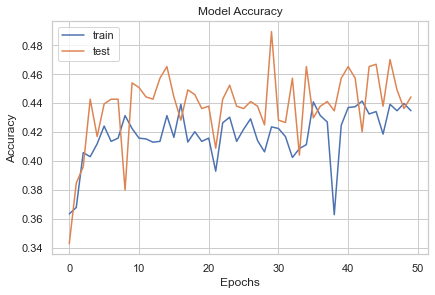

In [53]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [54]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)
test_digits = np.argmax(y_test,axis=1)
print("Accuracy : {}".format(accuracy_score(test_digits, pred_digits)))

Accuracy : 0.4444444444444444


In [55]:
pred_labels = le.inverse_transform(pred_digits)

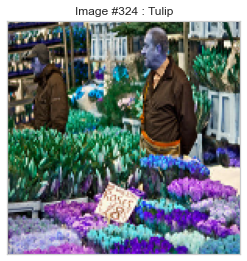

In [56]:
display_random_image(class_names, x_test, pred_labels)

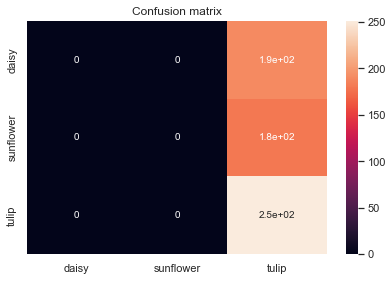

In [60]:
CM = confusion_matrix(test_digits, pred_digits)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()